### ADS Assignment 7
1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.
2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.
3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)
4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.
5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.
6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.
7. Isolate all the categorical column names into a list named ‘categorical’.
8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.
9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.
10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Loading the data set
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Exploring the dataset

In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


To explore the dataset I employed dtypes, info() and describe(). dtypes shows me the columns that are categorical and those that are numerical. From this, I am able to know which columns will work for univariate analysis and the ones to use for bi-variate analysis. info() shows me the count of non-null values and from this i am able to deduce if the columns are missing any values. Lastly, descibe() shows me the distribution of the numerical data types, the mean, standard deviation, range (min and max) as well as the quartiles.

As an insurance company, I can use this data to predict the following;
1. Optimize the marketing strategy to focus on the region as well as the characterics of the most profitable clients for example smokers vs non smoker, age, bmi and children or no children.
2. Reduce risk by denying insurance cover to the least profitable clients (very heartless thing to do).
3. Detecting fraud by analyzing the outliers.

In [9]:
fig = px.histogram(insurance, x="age")
fig.update_layout(
    title={
        'text': "Insurance Client Age Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

The histogram shows that majority of the clients are within 18-19 years of age while the least number of clients are between 64 and 65 years. From this I can deduce that the young clients rarely fall sick and therefore more profitable while the older clients are in the cancer window therefore are more costly to the company making them the least profitable. 

In [10]:
# making a list of numerical values
numerical = [var for var in insurance.columns if insurance[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [13]:
# Filtering the discrete variables
numerical_discrete = []
for var in numerical:
    if len(insurance[var].unique())<20:
        numerical_discrete.append(var)
print('There are {} numerical_discrete variables'.format(len(numerical_discrete)))
numerical_discrete

There are 1 numerical_discrete variables


['children']

In [15]:
# Filtering the continuous variables without the target 
numerical_continuous = [var for var in numerical if var not in numerical_discrete and var not in ['charges']]

print('There are {} numerical_continuous variables'.format(len(numerical_continuous)))
numerical_continuous

There are 2 numerical_continuous variables


['age', 'bmi']

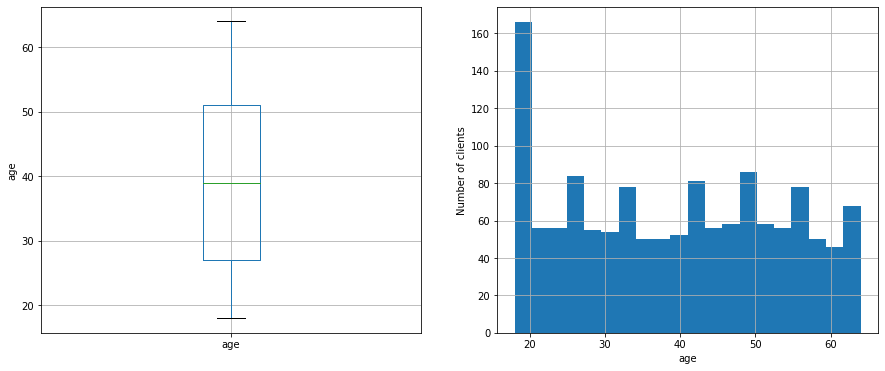

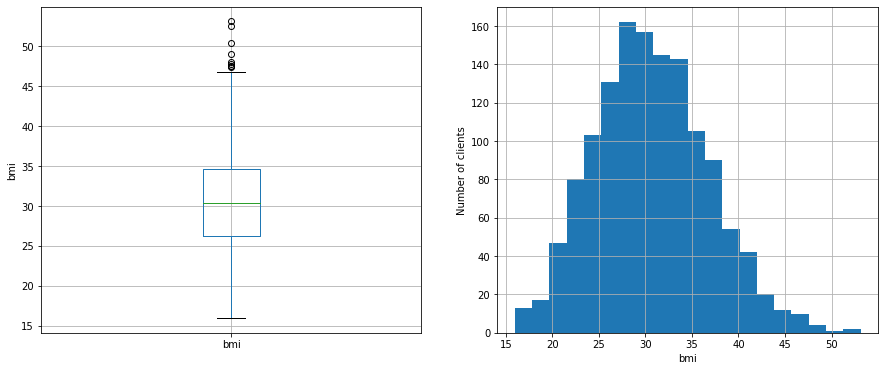

In [18]:
# make boxplots to visualize the outliers in the numerical_continuous dataframe and histograms to get an idea of the distribution
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = insurance.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = insurance[var].hist(bins=20)
    fig.set_ylabel('Number of clients')
    fig.set_xlabel(var)

    plt.show()


In [37]:
# From the description of the bmi (in EDA above), the mean is 30 and the std is 6
# Given that the outliers are above 47,
# The zscore threshold chosen is 2 standard deviations above the mean
# from scipy import stats
zscore = np.abs(stats.zscore(insurance['bmi']))
threshold = 2
print(np.where(zscore>2))

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
        383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
        547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
        821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
       1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
       1317, 1332]),)


In [38]:
# treating outliers
insurance_clean = insurance
insurance_clean = insurance_clean[(zscore<2)]

In [39]:
insurance.shape

(1338, 7)

In [40]:
insurance_clean.shape

(1281, 7)

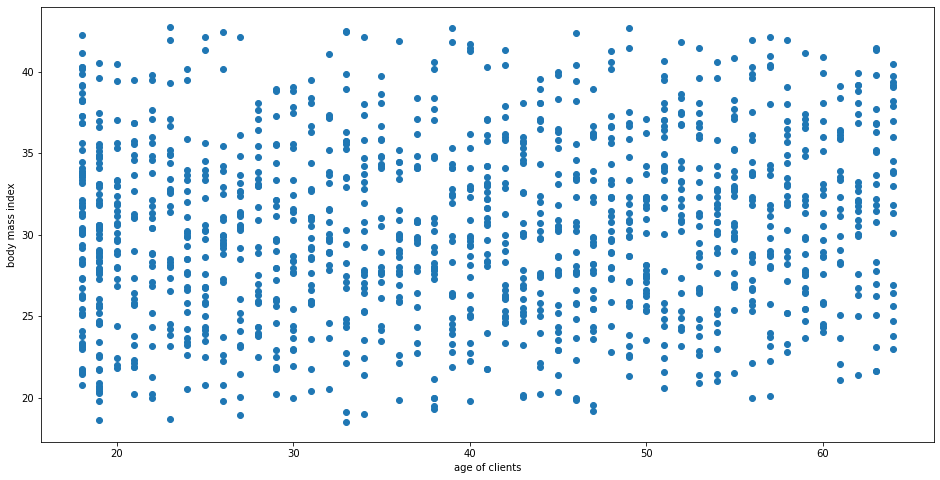

In [41]:
# bmi has several outliers, now to visualize them in a scatter
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(insurance_clean['age'], insurance_clean['bmi'])
ax.set_xlabel('age of clients')
ax.set_ylabel('body mass index')
plt.show()

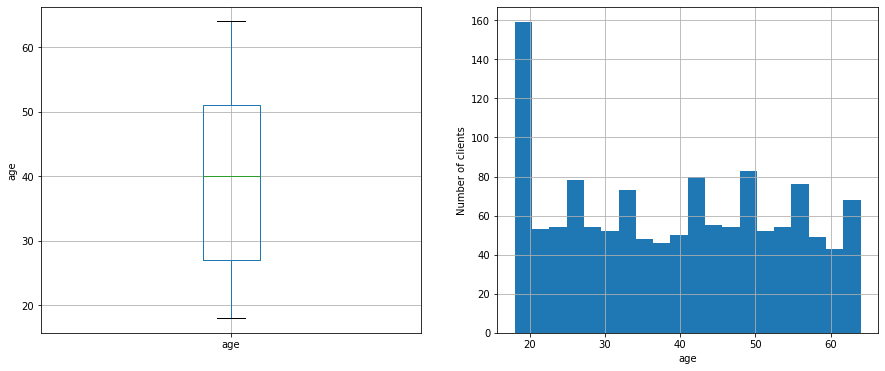

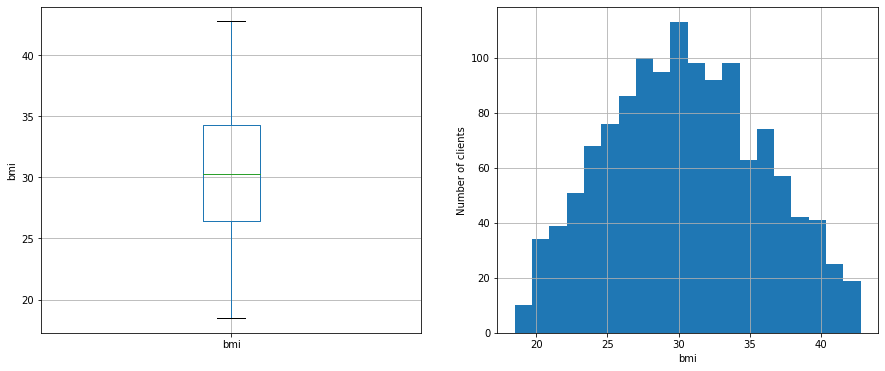

In [42]:
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = insurance_clean.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = insurance_clean[var].hist(bins=20)
    fig.set_ylabel('Number of clients')
    fig.set_xlabel(var)

    plt.show()

The description of bmi showed that the mean was 30 and the stdev was 6. A threshold of 3 meant that some outlier would creep in i.e. mean + 3 * standard deviation = 48; I therefore went with a threshold of 2 to eliminate all the outliers as seen in the figure above. The box plot nolonger has any outliers and the histogram shows a more normally distributed dataset

In [43]:
# find categorical variables
categorical = [var for var in insurance_clean.columns if insurance_clean[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 3 categorical variables


['sex', 'smoker', 'region']

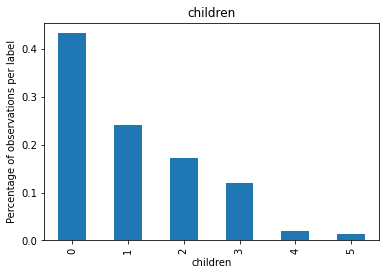

0    0.433255
1    0.241998
2    0.173302
3    0.119438
4    0.019516
5    0.012490
Name: children, dtype: float64


In [45]:
#Outliers in discrete variables
for var in numerical_discrete:
    (insurance_clean.groupby(var)[var].count() / np.float(len(insurance_clean))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    print(insurance_clean[var].value_counts() / np.float(len(insurance_clean)))

Rare values usually are those that are present in less than 1% of the clients. In this case the clients that have 4 and 5 children are 1.95% and 1.25% respectively. These values are not less than 1% so I am not going to treat them as outliers.

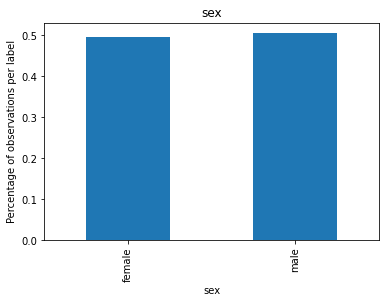

male      0.505074
female    0.494926
Name: sex, dtype: float64


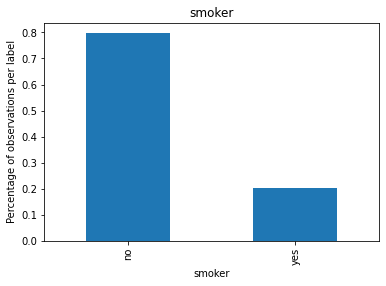

no     0.796253
yes    0.203747
Name: smoker, dtype: float64


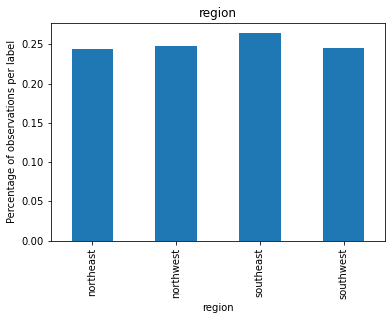

southeast    0.263856
northwest    0.247463
southwest    0.245121
northeast    0.243560
Name: region, dtype: float64


In [46]:
#Outliers in categorical variables
for var in categorical:
    (insurance_clean.groupby(var)[var].count() / np.float(len(insurance_clean))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    print(insurance_clean[var].value_counts() / np.float(len(insurance_clean)))

In [50]:
# just so that I don't fail
# I am going to rare impute the 4 and 5 variables in the children column
# Even though I believe they are not rare
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = insurance_clean.groupby([variable])[variable].count()/np.float(len(insurance_clean))
    frequent_cat = [x for x in temp.loc[temp>0.02].index.values]
    
    insurance_clean[variable] = np.where(insurance_clean[variable].isin(frequent_cat), insurance_clean[variable], 'Rare')
    

In [53]:
# find infrequent labels in categorical variables and replace by Rare
for var in numerical_discrete:
    rare_imputation(var)

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
for var in categorical:
    rare_imputation(var)

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

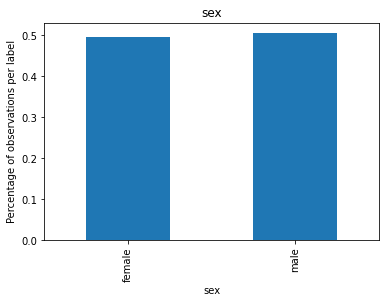

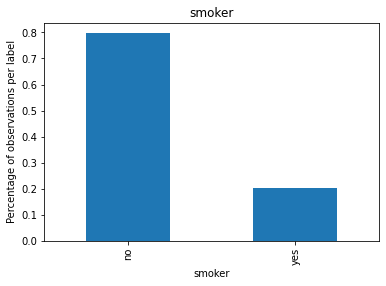

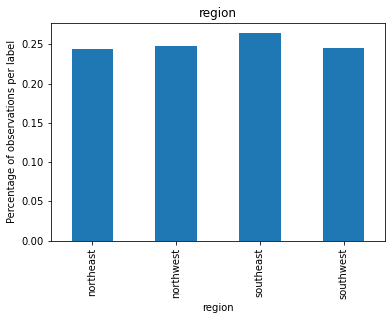

In [56]:
# checking if it worked
for var in categorical:
    (insurance_clean.groupby(var)[var].count() / np.float(len(insurance_clean))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

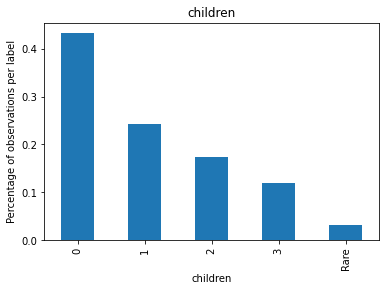

In [57]:
# checking if it worked
for var in numerical_discrete:
    (insurance_clean.groupby(var)[var].count() / np.float(len(insurance_clean))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

For this instance, I took the outliers that are less than 2% and imputed them as rare, only the those that had 4 and 5 children were rare enough to meet the criterion.

In [58]:
#Using target encoding (charges) for the categorical and discrete variables
def encode_categorical_variables(var, target):
        # make label to charges dictionary
        ordered_labels = insurance_clean.groupby([var])[target].mean().to_dict()
        
        # encode variables
        insurance_clean[var] = insurance_clean[var].map(ordered_labels)

In [59]:
# encode labels in categorical variables
for var in categorical:
    encode_categorical_variables(var, 'charges')

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
# encode labels in discrete variables
for var in numerical_discrete:
    encode_categorical_variables(var, 'charges')

/home/groot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
#Inspecting the dataset
insurance_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,12429.505375,27.900,12324.348977,31846.616835,12340.480789,16884.92400
1,18,14075.813874,33.770,12904.081811,8505.285285,14532.869080,1725.55230
2,28,14075.813874,33.000,15540.082132,8505.285285,14532.869080,4449.46200
3,33,14075.813874,22.705,12324.348977,8505.285285,12507.216229,21984.47061
4,32,14075.813874,28.880,12324.348977,8505.285285,12507.216229,3866.85520


Encoded the categorical and discrete variables with the mean of the charges in the targeted encoding

In [63]:
# Separating the features from the target
df = insurance_clean
X = df.drop("charges",1) #Features
y = df["charges"] # Target
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,12429.505375,27.900,12324.348977,31846.616835,12340.480789,16884.92400
1,18,14075.813874,33.770,12904.081811,8505.285285,14532.869080,1725.55230
2,28,14075.813874,33.000,15540.082132,8505.285285,14532.869080,4449.46200
3,33,14075.813874,22.705,12324.348977,8505.285285,12507.216229,21984.47061
4,32,14075.813874,28.880,12324.348977,8505.285285,12507.216229,3866.85520


In [65]:
#Features
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [67]:
#Target
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1281, dtype: float64

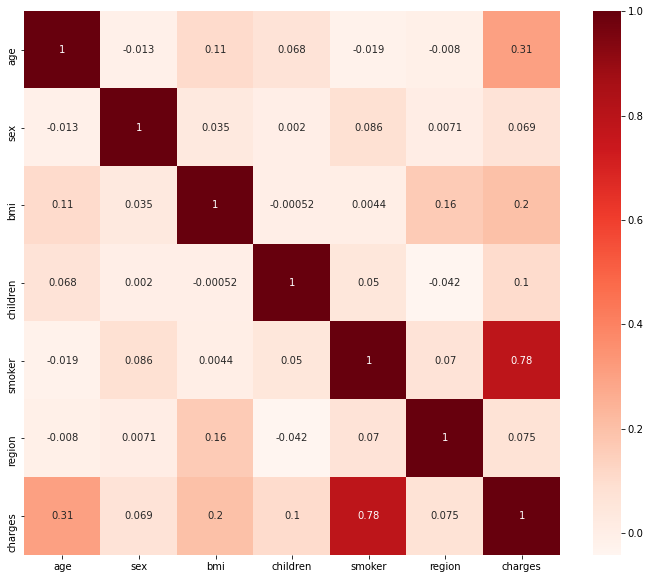

In [68]:
# Narrowing down the features using the Filter method
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [69]:
# Correlation with output variable
cor_target = abs(cor["charges"])
cor_target

age         0.305545
sex         0.068727
bmi         0.201364
children    0.104436
smoker      0.784990
region      0.074645
charges     1.000000
Name: charges, dtype: float64

In [70]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

smoker     0.78499
charges    1.00000
Name: charges, dtype: float64